In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import zipfile
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("..") # Adds higher directory to python modules path.

print(f"Current working dir is {os.getcwd()}")

from utils import *
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = [15, 7]

Current working dir is /home/jma/Python3.7/Cubist_2021_11/dataset_process


In [2]:
# settings
data_root = '/home/jma/Python3.7/Cubist_2021_11'
dtcol = 'data_date'
seccol = 'security_id'

ds_id = 2
ds_filename = f'data_set_{ds_id}.csv'
scorecol = f'd{ds_id}'

In [3]:
df = preprocess_dataset_from_one_to_seven(data_root, ds_id, dtcol=dtcol, seccol=seccol)

Getting data from file 'data_set_2.csv' for score 'd2'.

df.head():
   data_date security_id       d2
3 2010-01-04     1178501      NaN
4 2010-01-04     1323901   0.7976
5 2010-01-04     1384501      NaN
6 2010-01-04     1536201      NaN
7 2010-01-04     1604101 -10.3810

df.tail():
        data_date security_id      d2
127261 2017-12-26     3538501  37.843
127262 2017-12-26     4943501   1.787
127263 2017-12-27  1117183801  -1.238
127264 2017-12-28      647001  -3.554
127265 2017-12-29     2968101  -0.028

getting df shape of (127266, 3)

No duplicates dtcol-seccol pairs is found.

shape of df (127266, 3).

data_date      datetime64[ns]
security_id            object
d2                    float64
dtype: object


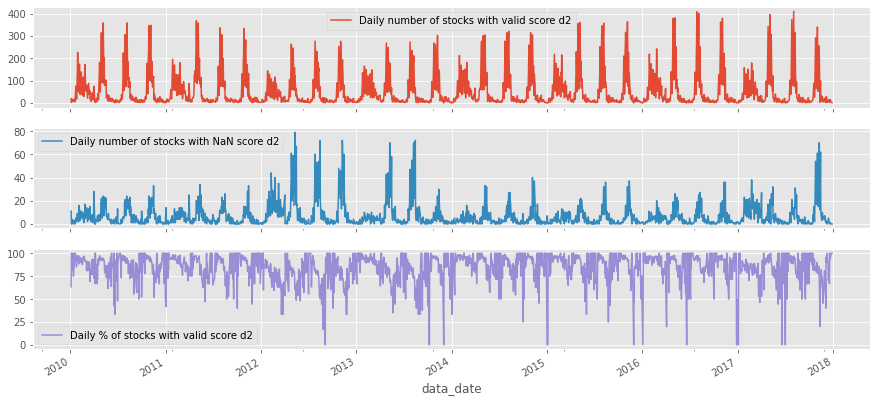

In [4]:
# plot the daily stock counts
plot_daily_stock_count(df, scorecol, dtcol=dtcol)

In [5]:
## Since 0 normally carries useless information in this type of sparse dataset, thus we replace 0 with NaN and drop them 
print(df.isnull().sum())
df[scorecol] = df[scorecol].replace([0, np.inf, -np.inf], np.nan)
print(df.isnull().sum())

data_date          0
security_id        0
d2             14636
dtype: int64
data_date          0
security_id        0
d2             14659
dtype: int64


In [6]:
df.groupby(dtcol).apply(lambda x: pd.Series([x[scorecol].isnull().sum(), x[scorecol].notnull().sum()]))

0   1
data_date         
2010-01-04  11  19
2010-01-05   0   2
2010-01-06   0   7
2010-01-07   1  17
2010-01-08   4  17
...         ..  ..
2017-12-22   1  14
2017-12-26   0   3
2017-12-27   0   1
2017-12-28   0   1
2017-12-29   0   1

[1992 rows x 2 columns]

 Dropping all NaNs
                 d2
count  1.126070e+05
mean   6.190963e+03
std    2.594794e+05
min   -9.705380e+06
25%   -6.163150e+00
50%    2.107700e+01
75%    1.531690e+02
max    2.178200e+07


<AxesSubplot:>

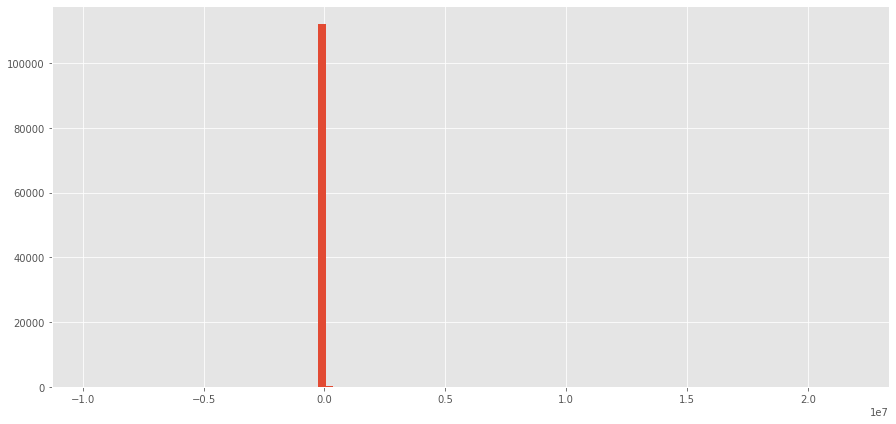

In [7]:
print(" Dropping all NaNs")
df.dropna(subset=[scorecol], inplace=True)
print(df.describe())
df[scorecol].hist(bins=100)

In [8]:
print("Loading the generated research universe")
rsch_universe = pd.read_csv(os.path.join(data_root, 'new_processed_csvs/new_rsch_universe.csv.gz'), compression='gzip',
                            usecols=[dtcol, seccol],
                            parse_dates=[dtcol], dtype={seccol: str})

Loading the generated research universe


In [9]:
print("Merging the dataset with research universe")
data = pd.merge(df, rsch_universe, on=[dtcol, seccol], how='inner')

Merging the dataset with research universe


In [10]:
print("Counting NaNs for each column\n", data.isnull().sum())

Counting NaNs for each column
 data_date      0
security_id    0
d2             0
dtype: int64


In [11]:
data.tail()

data_date security_id        d2
78017 2017-12-22     5464701   923.200
78018 2017-12-22      597001    55.584
78019 2017-12-22       78001   -20.100
78020 2017-12-22     8386601  4330.280
78021 2017-12-26     3538501    37.843

<AxesSubplot:title={'center':'Daily d2 #stocks falling into the trading universe'}, xlabel='data_date'>

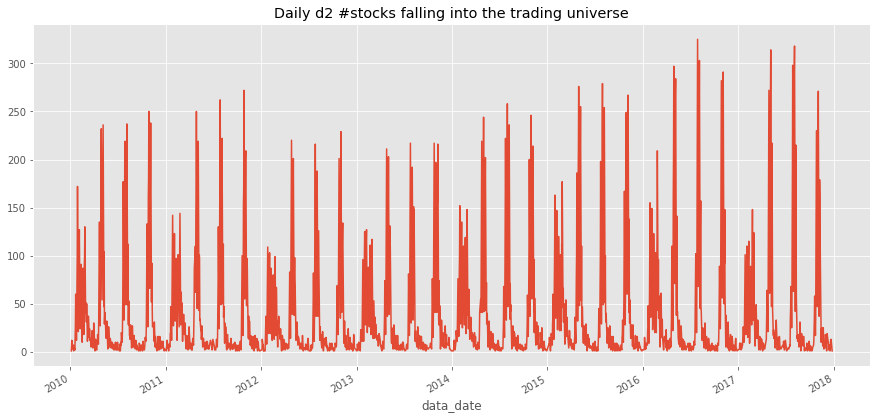

In [12]:
data.groupby(dtcol).size().plot(title=f'Daily {scorecol} #stocks falling into the trading universe')

In [13]:
data.to_csv(os.path.join(data_root, f'new_processed_csvs/new_data_{ds_id}.csv.gz'), index=False, compression='gzip')

In [ ]:
def plot_timeseries_dist(df, scorecol, dtcol, plot_min_max=False):
    
    if plot_min_max:
        ts_series = df.groupby(dtcol)[scorecol].apply(
            lambda x: pd.Series(
                [x.min(), x.quantile(0.2), x.quantile(0.4), x.quantile(0.6), x.quantile(0.8), x.max()],
                 index=['Min', '20%', '40%', '60%', '80%', 'Max']))
    else:
        ts_series = df.groupby(dtcol)[scorecol].apply(
            lambda x: pd.Series(
                [x.quantile(0.2), x.quantile(0.4), x.quantile(0.6), x.quantile(0.8)],
                 index=['20%', '40%', '60%', '80%']))
    ts_series.unstack().plot()

In [ ]:
plot_timeseries_dist(data, scorecol, dtcol, plot_min_max=False)

In [ ]:
os.getcwd()